<a href="https://colab.research.google.com/github/fereol023/My-ML-Courses-/blob/main/TD3ClassificationBaseObesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application prédiction de l'obésité

Dans cette application on vous propose de générer un modèle de prédiction de l'obésité à partir d'un ensemble de caractéristique et informations de la personne. Vous utiliserez une méthode de classification supervisée que vous appliquerez sur un ensemble de données réelles : "ObesityDataSet.csv" 
https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# I- Connection à votre drive pour lecture des données:

Cette étape est nécessaire seulement si vous travailler sous Clobal. Si vous travailler avec un aure éditeur python sur votre machine, il suffit de placer le fichier "ObesityDataSet.csv" dans votre répertoire de travail.

1- Créer sur votre drive google un répertoire au nom "data" et importer dedans le fichier ObesityDataSet.csv

2- Créer une connection à votre drive en exécutant le code suivant:

```
from google.colab import drive
drive.mount(‘/content/drive’)
```
4- Suivre les étapes de connection et copier le lien envoyé.
Si vous avez de difficultés, vous pouvez visualiser cette vidéo: https://youtu.be/TDyfhlg23vs



In [ ]:
#céer une connection avec google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# II- Importation des données dans un frame pandas : 
Compléter le code suivant afin d’importer les données du fichier pima.csv et afficher les caractéristiques correspondantes.
1- Importer la librairie pandas

2- lire le fichier ObesityDataSet.csv (copier le chemin complet à partir de votre drive)

3- Afficher les dimensions de la table avec la propriété shape

4-afficher les colonnes et leurs types

In [2]:
import requests
import io

#importer  la librairie Pandas
import pandas as pd
#lecture du fichier "ObesityDataSet.txt" avec la fonction read_csv de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)

#LECTURE DU FICHIER DE DONNEES DEPUIS MON DEPOT GITHUB

url = "https://raw.githubusercontent.com/fereol023/My-ML-Courses-/main/ObesityDataSet.csv"
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode()), sep=';')

#afficher les dimensions de la table des données (propriété shape)
print(data.shape)
#afficher la liste des colonnes data.columns
print(data.columns)
#afficher la liste des colonnes et leurs types (propriété dtypes)
print(data.dtypes)
#afficher les 10 premières lignes avec data.head(10)
data.head(10)

(2111, 17)
Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


#III- Préparation des données d'apprentissage

## 1- Vérification des données
1. Vérifier s'il y a des valeurs non renseignées (nulles)
`print(data.isnull().sum())`
2. Afficher la description des données avec la fonction describe: `data.describe()`



In [4]:
#compter les valeurs nulles
print(data.isnull().sum())
#description des données
data.describe()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## 2- Transformation des données

1. Transformer les données booléennes en utilisant `LabelBinarizer`

2. Transformer les données ordinales en utilisant `OrdinalEncoder`

3. ransformer les données texte en utlisant `LabelEncoder`


In [5]:
#transformation en matrice numpy seul reconnu par scikit learn
#data = data.to_numpy()
from sklearn import preprocessing

Encoder1 =preprocessing.LabelEncoder()
#ou
Encoder2 = preprocessing.LabelBinarizer()
#ou
Encoder3 = preprocessing.OrdinalEncoder()

#binarisation des champs booléen yes/no avec Encoder2
data["FAVC"]=Encoder2.fit_transform(data["FAVC"])
#transformer les colonnes "SMOKE", "family_history_with_overweight" et "SCC"
for colname in ["SMOKE", "family_history_with_overweight", "SCC"] : 
  data[colname]=Encoder2.fit_transform(data[colname])

#Labelisation des champ textes avec Encoder3
#transformer les colonnes "CAEC","CALC"
for colname in ["CAEC","CALC"] : 
  data[[colname]]=Encoder3.fit_transform(data[[colname]])

#Labelisation des champ textes avec Encoder1
data["Gender"]=Encoder1.fit_transform(data["Gender"])
#transformer les colonnes "CAEC","CALC", "MTRANS", "NObeyesdad"
for colname in ["MTRANS", "NObeyesdad"] : 
  data[colname]=Encoder1.fit_transform(data[colname])

#Transformation de NObeyesdad
for i in [2,3,4,5,6] : 
  data["NObeyesdad"]=data["NObeyesdad"].replace(i,0)

#afficher les 10 premières lignes
print(data.head(10))

#afficher les 10 dernières lignes 
print(data.tail(10))

#afficher la liste des colonnes et leurs nouveaux types (propriété dtypes)
print(data.dtypes)


   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
4       1  22.0    1.78    89.8                               0     0   2.0   
5       1  29.0    1.62    53.0                               0     1   2.0   
6       0  23.0    1.50    55.0                               1     1   3.0   
7       1  22.0    1.64    53.0                               0     0   2.0   
8       1  24.0    1.78    64.0                               1     1   3.0   
9       1  22.0    1.72    68.0                               1     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  NObeyesdad  
0  3.0   2.0      0   2.0    0  0.0  1.0   3.0       3       

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Il y a : 287  personnes classées dans la classe 1 (Normal weight).


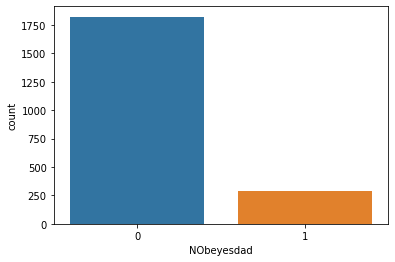

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
v=data['CAEC']
sns.countplot(v)
v=data["NObeyesdad"]
sns.countplot(v)
print("Il y a :",sum(data["NObeyesdad"])," personnes classées dans la classe 1 (Normal weight).")

## 3- Séparation des données input(X)/output(Y)

 Transformer le tableau pandas en matrice Numpy (avec la fonction to_numpy) et séparer ensuite les données explicatives X (16 premières variables) et de la cible Y (dernière variable). Utiliser le slicing.

In [7]:
#transformer d'abord data en numpy avec la méthode to_numpy
dataNp=data.to_numpy()
n_size = data.shape[1]
#séparation des données explicatives X et de la cible Y avec le slicing
X = dataNp[:, 0:n_size-1]
#y vecteur de la var. à prédire
Y = dataNp[:,n_size-1]
#Y doit être de type Int
Y=Y.astype(int)
#vérifer les types la structure
print(X.shape, Y.shape)
print(Y.dtype)
print(X)
print(Y)

(2111, 16) (2111,)
int64
[[ 0.       21.        1.62     ...  1.        3.        3.      ]
 [ 0.       21.        1.52     ...  0.        2.        3.      ]
 [ 1.       23.        1.8      ...  1.        1.        3.      ]
 ...
 [ 0.       22.524036  1.752206 ...  0.646288  2.        3.      ]
 [ 0.       24.361936  1.73945  ...  0.586035  2.        3.      ]
 [ 0.       23.664709  1.738836 ...  0.714137  2.        3.      ]]
[1 1 1 ... 0 0 0]


## 4- Scaling des données 
**Faire cette question après avoir fait au moins un test de classfication sans "sclaling"**

Les variables dans l'échantillon data ont des échelles différentes. Pour optimiser la performance de certaines techniques de classification comme les SVMs, il est conseillé  soit de normaliser (StandardScaler) soit de mettre à l'échelle 0-1 (Min-Max) toutes les variables. Dans ce cas, on vous suggère de tester les deux cas comme suit:

1. Appliquer la méthode StandardScalar() comme suit:
```
x_normalized=preprocessing.StandardScaler().fit_transform(x)
```
2. Appliquer la méthode MinMaxdScalar() comme suit:
```
x_scaled=preprocessing.MinMaxScaler().fit_transform(x)
```

In [8]:
#importer le module preprocessing
from sklearn import preprocessing

#Normaliser les donnes
x_normalized=preprocessing.StandardScaler().fit_transform(X)
#
x_scaled = preprocessing.MinMaxScaler().fit_transform(X)

## 3- Découpage des données train/test

1. Découper  les données `x_nomalized` ou `x_scaled` en données train et test avec la fonction **train_test_split** du module **model_selection** de pandas. La taille de l’échantillon train est égale à 70% (paramètre test_size de la fonction `train_test_split`).
Effectuer ce découpage afin de créer (x_train, y_train) à partir de  `x_nomalized` ou `x_scaled`.

2. Afficher les structures des ensembles crées en utilisant la propriété  `shape` de chaque vecteur.

In [11]:
#Subdivision des données en données train et test avec la fonction train_test_split du module model_selection de pandas
#importation du module model_selection de scikit learn
from sklearn.model_selection import train_test_split
#subdivision des données  éch.app = 70%
x_train, x_test, y_train, y_test = train_test_split(x_normalized,Y, test_size=0.3)
x1_train, x1_test, y1_train, y1_test = train_test_split(x_scaled,Y, test_size=0.3)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
pd.DataFrame(x_train).head()


(1477, 16) (634, 16) (1477,) (634,)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.011914,-0.370429,-1.389511,-1.629417,-2.117337,-2.759769,1.088342,-1.394626,-1.834434,-0.1459,1.049670,-0.218272,-0.481521,-1.080625,1.419172,0.503337
1,-1.011914,-0.521895,-0.553986,0.055027,0.472291,0.362349,0.119018,-2.165040,0.300346,-0.1459,1.618759,-0.218272,0.871785,0.561997,1.419172,0.503337
2,-1.011914,-0.360497,-0.656621,0.028952,0.472291,0.362349,1.088342,-2.167023,0.300346,-0.1459,1.618759,-0.218272,0.318238,1.839874,1.419172,0.503337
3,0.988227,-0.785418,0.703856,-1.179515,0.472291,0.362349,-0.785019,1.689740,0.300346,-0.1459,0.243769,-0.218272,1.163820,1.677581,1.419172,-1.875493
4,-1.011914,-0.837360,-0.017981,-0.862558,0.472291,0.362349,1.088342,0.404153,2.435125,-0.1459,1.618759,4.581439,2.339750,0.561997,1.419172,0.503337


# IV - Classification avec le modèle de régression logistique
Comme première approche de classification, nous utiliserons la régression logistique.

1-A partir du module `linear_model` du package sklearn, importer la classe `LogisticRegression`.

2- Créer une instance de la classe `LogisticRegression`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre premier modèle prédictif que vous appellerez « lr_model ».  Pour ce faire, il faut exécuter la fonction fit de la classe LogisticRegression qui prend comme argument les ensembles les données explicatives `x_train` et les données cibles `y_train`. R

4- Appliquer les modèles générés sur les données tests `x_test` à travers la fonction `predict'.

5- Importer le module seaborn `import seaborn as sns`

6- Afficher la matrice de confusion.




LR METRICS
accuracy : 85.02 %
recall : 52.27 %
f1 score : 32.62 %
LR Confusion matrix
Il y a :  97 personnes dans la classe 1 (Normal weight).
[[516  74]
 [ 21  23]]


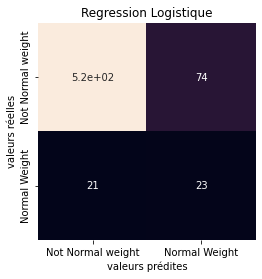

In [34]:
line="====="*5
#importer la classe LogisticRegression
from sklearn.linear_model import LogisticRegression
#création d'une instance de la classe : lr_model
lr_model=LogisticRegression()

#exécution de l'instance sur les données d'apprentissage x1_train et x2_train
#c.à d . construction du modèle prédictif
lr_fit = lr_model.fit(x_train, y_train)
#application des modèles sur les données test
y_pred=lr_fit.predict(x_test)

#Importer le module metric
from sklearn import metrics
#Calculer les scores des modèles (accuracy, recall et f1_score )
lr_model_score=metrics.accuracy_score(y_pred, y_test)
lr_model_recall = metrics.recall_score(y_pred, y_test)
lr_model_f1 = metrics.f1_score(y_pred, y_test)
#Affichier les scores. Que remarquez vous?
print(line)
print("LR METRICS")
print("accuracy :", round(lr_model_score*100,2), "%")
print("recall :", round(lr_model_recall*100,2), "%")
print("f1 score :", round(lr_model_f1*100,2), "%")
#création et affichage de la matrice de confusion
matrix_lr = metrics.confusion_matrix(y_pred, y_test)
labels = ["Not Normal weight", "Normal Weight"]
print(line)
print("LR Confusion matrix")
print("Il y a : ", sum(y_test), "personnes dans la classe 1 (Normal weight).")
print(matrix_lr)
sns.heatmap(matrix_lr, square=True, annot=True, cbar=False, xticklabels=list(labels), yticklabels=list(labels))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.title("Regression Logistique")
plt.show()

# VII- Classification par les SVM
Comme quatrième approche de classification, nous utiliserons les SVM.

1-A partir du module `svm` du package sklearn, importer la classe `SVC`.

2- Créer une instance de la classe `SVC` de `sklearn.svm`.

3- Exécuter l'instance sur les données d'apprentissage `x_train` afin de construire votre quatrième modèle prédictif que vous appellerez « svm_model ».  Pour ce faire, il faut exécuter la fonction fit de la classe SVC.

4- Appliquer le modèle généré sur les données tests `x_test` à travers la fonction `predict`.

5- Afficher la matrice de confusion.

SVM METRICS
accuracy : 84.54 %
recall : 48.15 %
f1 score : 20.97 %
Confusion Matrix
Il y a :  97 personnes dans la classe 1 (Normal weight).
[[523  84]
 [ 14  13]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


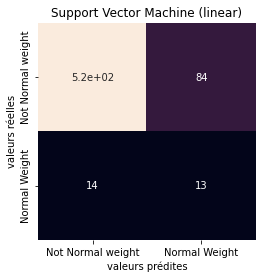

In [35]:
#importer la classe SVC
from sklearn.svm import LinearSVC
 #instanciation de l’objet svm_model
svm_model=LinearSVC()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf
#c.à d . construction du modèle prédictif
svm_fit = svm_model.fit(x_train, y_train)
#application des modèles sur les données test
y_pred=svm_fit.predict(x_test)

#Calculer les scores des modèles (accuracy, recall et f1_score )
svm_model_score=metrics.accuracy_score(y_pred, y_test)
svm_model_recall = metrics.recall_score(y_pred, y_test)
svm_model_f1 = metrics.f1_score(y_pred, y_test)

#Affichier les scores. Que remarquez vous?
print(line)
print("SVM METRICS")
print("accuracy :", round(svm_model_score*100,2), "%")
print("recall :", round(svm_model_recall*100,2), "%")
print("f1 score :", round(svm_model_f1*100,2), "%")

#création et affichage de la matrice de confusion
matrix_svm = metrics.confusion_matrix(y_pred, y_test)
print(line)
print("Confusion Matrix")
print("Il y a : ", sum(y_test), "personnes dans la classe 1 (Normal weight).")
print(matrix_svm)
sns.heatmap(matrix_svm, square=True, annot=True, cbar=False, xticklabels=list(labels), yticklabels=list(labels))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.title("Support Vector Machine (linear)")
plt.show()

# VIII- Validation des modèles

1. Calculer les scores TPR et FPR de chaque modèle généré et les ajouter dans des listes

2. Afficher chaque score avec une courbe ou histogramme

Comparer les résultats

Logistic Regression
[[516  74]
 [ 21  23]]
SVM
[[523  84]
 [ 14  13]]


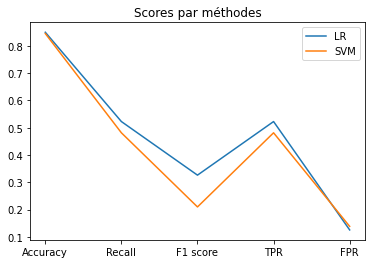

In [36]:
#Importer le Pyplot
import matplotlib.pyplot as plt  

#Afficher les matrices de confusion des modèles
print(line)
print("Logistic Regression")
print(matrix_lr)
#Calcul des scores TPR et FPR du modèle
TPR_lr = matrix_lr[1,1]/(matrix_lr[1,0]+matrix_lr[1,1])
FPR_lr = matrix_lr[0,1]/(matrix_lr[0,0]+matrix_lr[0,1])

print(line)
print("SVM")
print(matrix_svm)
#Calcul des scores TPR et FPR du modèle
TPR_svm = matrix_svm[1,1]/(matrix_svm[1,0]+matrix_svm[1,1])
FPR_svm = matrix_svm[0,1]/(matrix_svm[0,0]+matrix_svm[0,1])

#Ajouter tous les scores à une liste
s_labels = ["Accuracy", "Recall", "F1 score", "TPR", "FPR"]
scores_lr = [lr_model_score, lr_model_recall, lr_model_f1, TPR_lr, FPR_lr]
scores_svm = [svm_model_score, svm_model_recall, svm_model_f1, TPR_svm, FPR_svm]

#Afficher la liste des scores dans une courbe
print(line)
plt.plot(s_labels, scores_lr, label="LR")
plt.plot(s_labels, scores_svm, label="SVM")
plt.title("Scores par méthodes")
plt.legend()
plt.show()

# IX - Optimisation de la performance
Compléter cette application en cherchant des solutions pour optimiser la performance de vos modèles. Vous pouvez aussi tester d'autres modèles de classification comme les fôrets d'arbres de décision.

Decision Tree Metrics
accuracy : 93.38 %
recall : 82.35 %
f1 score : 76.92 %
Confusion Matrix
Il y a :  97 personnes dans la classe 1 (Normal weight).
[[522  27]
 [ 15  70]]


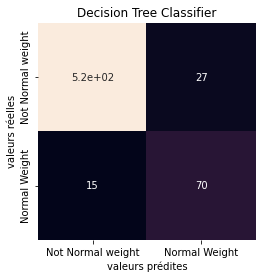

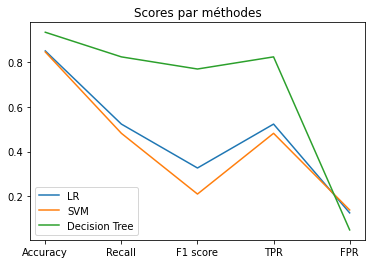

Decision Tree Classifier donne les meilleurs scores.


In [41]:
#importer la classe DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
#instanciation de l’objet 
tree_model=DecisionTreeClassifier()
#affichage des paramètres (paramètres par défaut ici c.à d. noyau ‘ rbf
#c.à d . construction du modèle prédictif
tree_fit = tree_model.fit(x_train, y_train)
#application des modèles sur les données test
y_pred = tree_fit.predict(x_test)

#Calculer les scores des modèles (accuracy, recall et f1_score )
tree_model_score=metrics.accuracy_score(y_pred, y_test)
tree_model_recall = metrics.recall_score(y_pred, y_test)
tree_model_f1 = metrics.f1_score(y_pred, y_test)

#Afficher les scores
print(line)
print("Decision Tree Metrics")
print("accuracy :", round(tree_model_score*100,2), "%")
print("recall :", round(tree_model_recall*100,2), "%")
print("f1 score :", round(tree_model_f1*100,2), "%")

#création et affichage de la matrice de confusion
matrix_tree = metrics.confusion_matrix(y_pred, y_test)
print(line)
print("Confusion Matrix")
print("Il y a : ", sum(y_test), "personnes dans la classe 1 (Normal weight).")
print(matrix_tree)
sns.heatmap(matrix_tree, square=True, annot=True, cbar=False, xticklabels=list(labels), yticklabels=list(labels))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.title("Decision Tree Classifier")
plt.show()

#Calcul des scores TPR et FPR du modèle
TPR_tree = matrix_tree[1,1]/(matrix_tree[1,0]+matrix_tree[1,1])
FPR_tree = matrix_tree[0,1]/(matrix_tree[0,0]+matrix_tree[0,1])

# Ajout de tous les scores à une liste 
scores_tree = [tree_model_score, tree_model_recall, tree_model_f1, TPR_tree, FPR_tree]

# Comparaison des scores des 3 méthodes
print(line)
plt.plot(s_labels, scores_lr, label="LR")
plt.plot(s_labels, scores_svm, label="SVM")
plt.plot(s_labels, scores_tree, label="Decision Tree")

plt.title("Scores par méthodes")
plt.legend()
plt.show()

print("Decision Tree Classifier donne les meilleurs scores.")